In [1]:
import numpy as np
import pandas as pd


In [2]:
data=pd.read_csv('E:\\Datasets\\diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

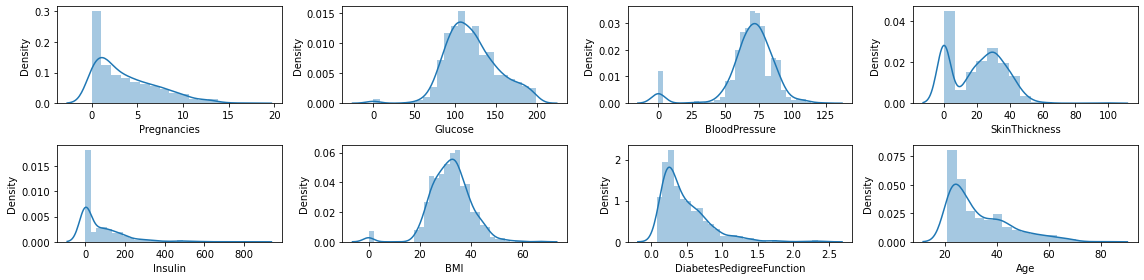

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
new_data=data.copy()
target=new_data['Outcome']
new_data=new_data.drop('Outcome',axis=1)
row=2
cols=4

col=data.columns
fig,ax=plt.subplots(nrows=row,ncols=cols,figsize=(16,4))
index=0
for i in range(row):
    for j in range(cols):
        sns.distplot(new_data[col[index]],ax=ax[i][j])
        index=index+1
plt.tight_layout()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-p

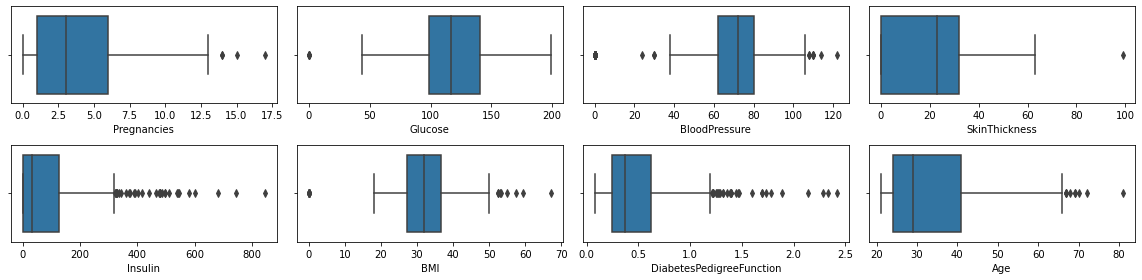

In [8]:

row=2
cols=4

col=data.columns
fig,ax=plt.subplots(nrows=row,ncols=cols,figsize=(16,4))
index=0
for i in range(row):
    for j in range(cols):
        sns.boxplot(data[col[index]],ax=ax[i][j])
        index=index+1
plt.tight_layout()

In [9]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

data_final = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [10]:
data_final.shape

(639, 9)

## managing imbalanced Class

In [11]:
from imblearn.over_sampling import SMOTE
target_x=data_final['Outcome']
train_data=data_final.drop('Outcome',axis=1)

smot=SMOTE(random_state=0, n_jobs=8)
x,y=smot.fit_resample(train_data,target_x)

## scalling

In [12]:

from sklearn.preprocessing import MinMaxScaler
scl=MinMaxScaler()
scl.fit(x.values)
scled_data=scl.transform(x.values)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scled_data,y,test_size=0.2)

In [14]:
from sklearn.svm import SVC

model=SVC(kernel='rbf',gamma=.10,C=1.0)

In [15]:
model.fit(x_train,y_train)

SVC(gamma=0.1)

In [16]:
pred=model.predict(x_test)

In [17]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        90
           1       0.82      0.76      0.79        86

    accuracy                           0.80       176
   macro avg       0.80      0.80      0.80       176
weighted avg       0.80      0.80      0.80       176



In [19]:
accuracy_score(y_test,pred)

0.8011363636363636

## hyper parametr tuning


In [20]:
from sklearn.model_selection import GridSearchCV

svm_model=SVC()
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm_model, param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [21]:
xpred=model.predict(x_test)
print(classification_report(y_test,xpred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        90
           1       0.82      0.76      0.79        86

    accuracy                           0.80       176
   macro avg       0.80      0.80      0.80       176
weighted avg       0.80      0.80      0.80       176



In [22]:
accuracy_score(y_test,xpred)

0.8011363636363636